<a href="https://colab.research.google.com/github/almirars/PCVK_ALMIRA/blob/main/js05/js05_Tugas_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- NIM  : 2241727003
- Nama : Almira Rahma Sabita
- Kelas :  TI 4J

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/drive/MyDrive/ML/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Separating Features and Target**

In [6]:
X = data.drop(['class'],axis=1)
y = data['class']

In [7]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


**Splitting Dataset to training and test data**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
X_train.shape , X_test.shape

((6499, 117), (1625, 117))

In [11]:
y_train.shape , y_test.shape

((6499,), (1625,))

**Decision Tree Creation**

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [13]:
from sklearn.metrics import accuracy_score

**Creation of Decision Tree using Gini Index**

In [14]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'X[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3076923076923077, 0.625, 'X[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.15384615384615385, 0.375, 'X[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.46153846153846156, 0.375, 'X[94] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.8461538461538461, 0.625, 'X[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7692307692307693, 0.375, 'X[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.002\nsamples = 2740\nval

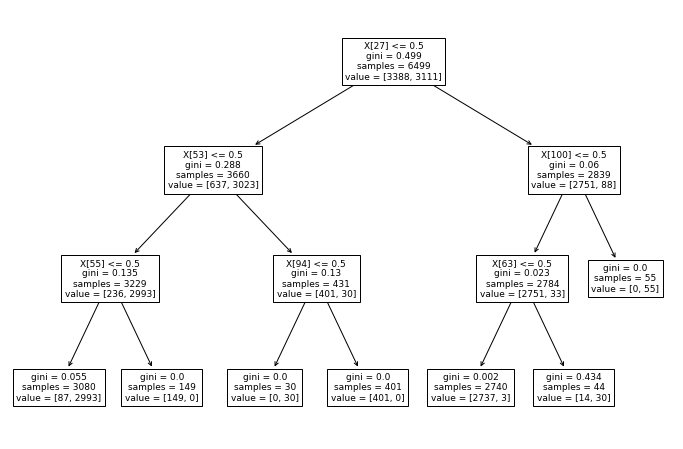

In [15]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [16]:
y_pred_gini = clf_gini.predict(X_test)

In [17]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 1, 1, 1])

In [18]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9902
Training-set accuracy score: 0.9840


**Creation of Decision Tree using with entropy**

In [19]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [21]:
y_pred_en = clf_en.predict(X_test)

In [22]:
y_pred_train_en = clf_en.predict(X_train)

In [23]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9637
Training-set accuracy score: 0.9611


**Kesimpulan**
Perbedaan hasil model accuracy dan training set accuracy dari decision tree menggunakan gini index dan entropy hampir sama karena perbedannya tidak jauh